This is an analysis code I found on medium that the author Hemanth came up with to analysis his gmail emails. 

( https://medium.com/@hemanthponnada23/gmail-data-analysis-using-python-184cc4a8f35b )

#### Import packages

In [87]:
import imaplib
import email
import yaml

import pandas as pd

now loading my credentials from my gmail account and storing it as a variable. 

In [88]:
with open('gmail_access.yaml') as f:
 content = f.read()
my_credentials = yaml.load(content, Loader = yaml.FullLoader)
user, password = my_credentials['user'], my_credentials['password']


Now let's log into my gmail account

In [89]:
imap_url = 'imap.gmail.com'
my_mail = imaplib.IMAP4_SSL(imap_url) #my_mail is an imaplib object that is created, which basically lets us connect to an IMAP server.
my_mail.login(user, password)

('OK', [b'masegomodibane@gmail.com authenticated (Success)'])

In [90]:
my_mail.select('Inbox') #select the total number of emails in the inbox we can use

('OK', [b'23391'])

In [91]:
data = my_mail.search(None, 'ALL') 
#Now the data object created will have all the email ids. 
#If you just print and look at the data object, you will see that it is just a tuple with two elements, 
# the first is just a message and the second is a list containing all the IDs of the emails.

create a list of all these email ids

In [92]:
mail_ids = data[1]
id_list = mail_ids[0].split()
len(id_list)#This should be equal to the total number of emails you have seen above
first_email_id = int(id_list[0])
latest_email_id = int(id_list[-1])

In [93]:
import pprint

In [ ]:
for num in id_list:
    tmp, data = my_mail.fetch(num, '(RFC822)')
    print('Message: {0}\n'.format(num))
    #pprint.pprint(data[0][1])
    for response in data:
        if isinstance(response, tuple):
            msg = email.message_from_bytes(response[1])
             
            # Retrieving the senders email 
            From = msg["From"]
 
            # Retrieving the subject of the email
            subject = msg["Subject"]

            date = msg['Date'] 

            antivirus = msg['X-Antivirus-Status']
 
            # Printing out Subject and sender details
            print("From : ", From)
            print("Subject : ", subject)
            print("Date : ", date)
            print("antivirus : ", antivirus)


    

You can actually loop from the last email id to the first and append all the messages in a data frame or you can do it from a specific number. 

Now let's create an empty pandas data frame.

In [105]:

email_df = pd.DataFrame(columns=['Date','From', 'Subject','Status'], index=range(3,first_email_id,-1))

"Now we need to fetch the response part from the emails and create a message object. 
Now from this message object, we need to extract the data that we need. 
Once we got the data, we need to append it to the data frame that we have created above."

The key element here is the msg variable which contains all the data.

In [108]:
#for i in range(3,first_email_id, -1):
for num in id_list:
  typ, data = my_mail.fetch(num, '(RFC822)' )
  for response_part in data:
    #arr = response_part[0]
    if isinstance(response_part, tuple):
      msg = email.message_from_bytes(response_part[1])
      #msg = email.message_from_string(str(arr[1],'ISO-8859–1'))
      #print(i) #This will let you know what row is being appended
      new_row = pd.Series({"Date":msg['Date'] , "From":msg['from'] , "Subject":msg['subject'] , "Status":msg['X-Antivirus-Status'] })
      email_df = pd.concat([email_df, new_row.to_frame().T], ignore_index=True)
      #email_df = email_df.append(new_row, ignore_index=True)


In [109]:
email_df

,Date,From,Subject,Status
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,"Wed, 06 Mar 2013 03:24:18 +0000",iTunes <itunes_world@new.itunes.com>,"New on iTunes: David Bowie, Brave, Apps for Ge...",None
3,"Tue, 19 Feb 2013 11:14:01 +0000",<enquiries@ucas.ac.uk>,UCAS Reference request (Personal ID: 110-443-1...,None
4,"Tue, 19 Feb 2013 03:38:32 -0800","""Evernote Team"" <team@evernote.com>",Tip: Save Anything from the Web with Our Web C...,None
...,...,...,...,...
23394,"Sun, 2 Oct 2022 12:03:35 -0400 (EDT)",Superbalist <getmore@superbalist.com>,=?utf-8?B?U3VuZGF5IHNhdmluZ3MgfCBVcCA=?=\r\n =...,None
23395,"Sun, 2 Oct 2022 17:54:48 +0000 (UTC)",LinkedIn Job Alerts <jobalerts-noreply@linkedi...,=?UTF-8?Q?16_new_jobs_for_=E2=80=9CData_Analys...,None
23396,"Sun, 02 Oct 2022 16:31:10 -0600","""iStore South Africa"" <news@email.istore.co.za>",Pre-order now - The New iPhone 14 Plus,None
23397,"Mon, 03 Oct 2022 03:02:56 +0000 (UTC)",Agoda <careers@careeralerts.agoda.global>,Agoda is hiring 50+ Analyst Positions - Apply ...,None


In [110]:
email_df.describe()

,Date,From,Subject,Status
count,23397,23397,23395,56
unique,23167,2627,17234,1
top,18 Sep 2020 05:52:44 +0200,"""Property24 Alert"" <no-reply@property24.com>",Apartment to rent in Sunninghill,Clean
freq,8,1554,390,56


In [113]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [114]:
import wordcloud

Creating a word cloud

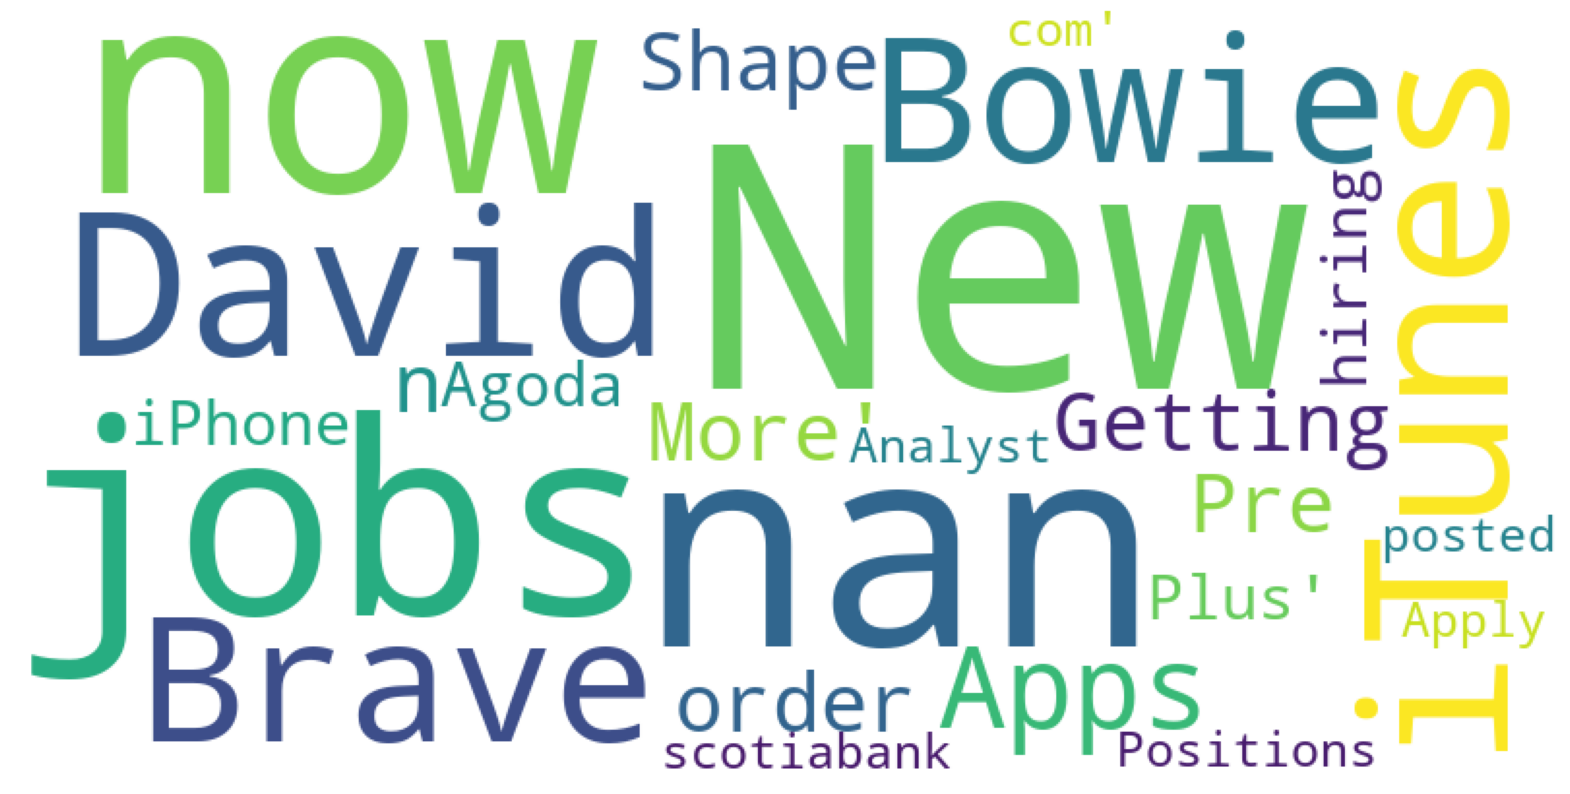

In [115]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = email_df['Subject'].values
stopwords = set(STOPWORDS)
stopwords.update([" "]) #You can add stopwords if you have any 
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(str(text))

plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

analysis of frequent messagers 



In [125]:
email_df['From'].value_counts()[:20]

"Property24 Alert" <no-reply@property24.com>            1554
"takealot.com" <news@mails.takealot.com>                1419
"Spree" <info@send.spree.co.za>                          790
LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>     553
Netflix <info@mailer.netflix.com>                        348
Virgin Active <noreply@virginactive.co.za>               304
Medium Daily Digest <noreply@medium.com>                 301
"Daddy's Daily Deals" <bigdeal@daddysdeals.co.za>        285
Modern Athlete <info@modernathlete.co.za>                260
Kuselo Ntsaluba <kn.ntsaluba@googlemail.com>             253
"Modibane, R. (Rapula)" <RapulaM@Nedbank.co.za>          228
"noreply@fnb.co.za" <noreply@fnb.co.za>                  211
"iStore South Africa" <info@mail-myistore.co.za>         208
Superbalist <getmore@superbalist.com>                    189
Quora Digest <digest-noreply@quora.com>                  158
"EasyEquities" <info@easyequities.co.za>                 153
LinkedIn <news@linkedin.

In [128]:
email_df[email_df['From'] == '"Modibane, R. (Rapula)" <RapulaM@Nedbank.co.za>']

,Date,From,Subject,Status
48,"Thu, 4 Apr 2013 16:16:37 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",Fwd: Verifications,None
56,"Thu, 11 Apr 2013 13:43:19 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",Fwd: Your application to course G110 at the Un...,None
61,"Mon, 15 Apr 2013 12:17:56 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",RE: MMath Degree,None
66,"Mon, 15 Apr 2013 13:44:51 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",RE: MMath Degree,None
74,"Fri, 19 Apr 2013 05:35:58 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",RE: Student number,None
...,...,...,...,...
8402,"Thu, 20 Dec 2018 10:58:03 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",FW: Lease agreement - 203 Chianti Lifestyle Es...,None
8442,"Tue, 25 Dec 2018 18:13:27 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",Automatic reply: Final signed Lease - 203 Chianti,None
9229,"Mon, 1 Apr 2019 12:18:36 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",FW: Financial Statement - University of Pretoria,None
11035,"Wed, 25 Sep 2019 09:07:05 +0000","""Modibane, R. (Rapula)"" <RapulaM@Nedbank.co.za>",Fwd: Financial Statement - University of Pretoria,None


<AxesSubplot:>

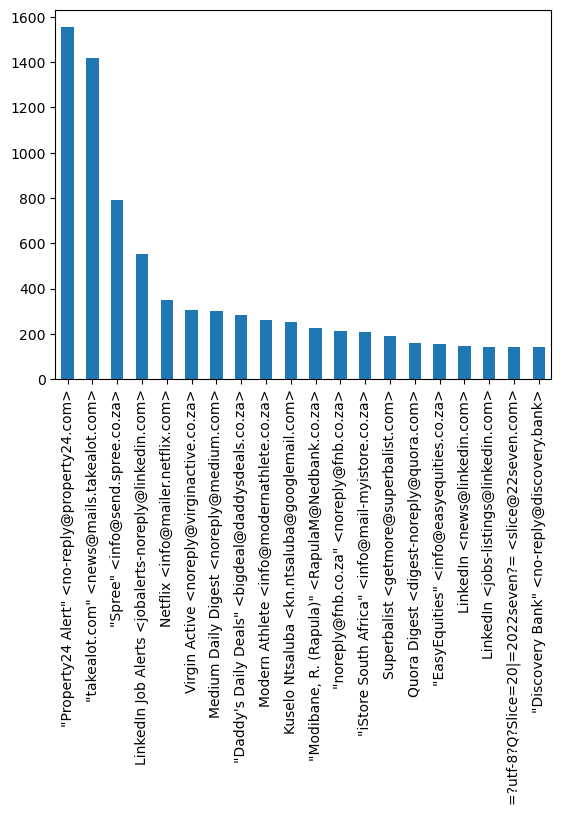

In [129]:
email_df['From'].value_counts()[:20].plot.bar()

In [140]:
email_df['Date1'] = pd.to_datetime(email_df['Date'])

ParserError: Unknown string format: Fri, 9 Feb 2018 11:50:14 +0000 (GMT-00:00)

In [142]:
email_df['Date'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                          NaN
1                                          NaN
2              Wed, 06 Mar 2013 03:24:18 +0000
3              Tue, 19 Feb 2013 11:14:01 +0000
4              Tue, 19 Feb 2013 03:38:32 -0800
                         ...                  
23394     Sun, 2 Oct 2022 12:03:35 -0400 (EDT)
23395     Sun, 2 Oct 2022 17:54:48 +0000 (UTC)
23396          Sun, 02 Oct 2022 16:31:10 -0600
23397    Mon, 03 Oct 2022 03:02:56 +0000 (UTC)
23398          Mon, 03 Oct 2022 03:18:37 +0000
Name: Date, Length: 23399, dtype: object>

In [118]:
email_df.plot.bar(x='From', y = email_df.From.count)

/var/folders/_r/0mbwmsn56rl_rr8h_2gs0tww0000gn/T/ipykernel_2622/1196504104.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  email_df.plot.bar(x='From', y = email_df.From.count)


ValueError: Series.count level is only valid with a MultiIndex